In [2]:
pip install transformers evaluate accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.2 MB/s eta 0:00:00


In [3]:
!pip install rouge-score

In [6]:
import torch
import warnings
from transformers import AutoTokenizer,  AutoModelForSeq2SeqLM
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from rouge_score import rouge_scorer

warnings.filterwarnings("ignore")

models = [
    "cnicu/t5-small-booksum",
    "sshleifer/distilbart-cnn-6-6",
    "Falconsai/medical_summarization",
    "Cohee/bart-factbook-summarization",
    "lidiya/bart-large-xsum-samsum"
]

prompts = [
   "The meaning of life is a philosophical question that has been debated for centuries. Different cultures, religions, and individuals may have varying perspectives on the purpose and significance of life.",
    "Why did the scarecrow win an award? Because he was outstanding in his field! Jokes bring laughter and joy to our lives, providing a break from the seriousness of everyday challenges.",
    "Today's weather forecast includes sunny skies with a slight breeze. It's a perfect day to spend time outdoors and enjoy the beauty of nature.",
    "One of my favorite books is 'The Hitchhiker's Guide to the Galaxy' by Douglas Adams. The novel combines humor, science fiction, and adventure, creating an engaging and memorable reading experience.",
    "If you need help with your homework, please provide more details about the subject or specific questions. I'll do my best to assist you!"

]

responses = [
    "The meaning of life is a subjective and debated philosophical question, varying across cultures and individuals.",
    "Why did the scarecrow win an award? Because he was outstanding in his field! Jokes bring joy and laughter to our lives.",
    "The weather today is sunny with a slight breeze, perfect for outdoor activities.",
    "'The Hitchhiker's Guide to the Galaxy' by Douglas Adams is one of my favorite books, combining humor and science fiction.",
    "I'm here to help with your homework! Please provide more details about the subject or specific questions you need assistance with."
]

results_dict = {}

def calculate_bleu(references, candidates):
    smoothie = SmoothingFunction().method4
    return corpus_bleu(references, candidates, smoothing_function=smoothie)

def calculate_rouge(references, candidate):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(references, candidate)
    rouge1 = scores['rouge1'].fmeasure
    rouge2 = scores['rouge2'].fmeasure
    rougeL = scores['rougeL'].fmeasure
    return rouge1, rouge2, rougeL

for model_name in models:
    bleu_scores = []
    rouge1_scores = []
    rouge2_scores = []
    rougeL_scores = []


    tokenizer = AutoTokenizer.from_pretrained(model_name)
    tokenizer.pad_token = tokenizer.eos_token
    model =  AutoModelForSeq2SeqLM.from_pretrained(model_name)


    input_ids = tokenizer(prompts, return_tensors="pt", padding=True, truncation=True)["input_ids"]


    with torch.no_grad():
        output = model.generate(input_ids=input_ids, max_length=100)


    generated_responses = [tokenizer.decode(ids, skip_special_tokens=True) for ids in output]

    for response, generated_response in zip(responses, generated_responses):
        # Calculate BLEU score
        bleu_score = calculate_bleu([[response]], [[generated_response]])
        bleu_scores.append(bleu_score)

        # Calculate ROUGE scores
        rouge1, rouge2, rougeL = calculate_rouge(response, generated_response)
        rouge1_scores.append(rouge1)
        rouge2_scores.append(rouge2)
        rougeL_scores.append(rougeL)



    # Calculate average scores
    avg_bleu_score = sum(bleu_scores) / len(bleu_scores)
    avg_rouge1_score = sum(rouge1_scores) / len(rouge1_scores)
    avg_rouge2_score = sum(rouge2_scores) / len(rouge2_scores)
    avg_rougeL_score = sum(rougeL_scores) / len(rougeL_scores)


    # Store results
    results_dict[model_name] = {
        "BLEU": avg_bleu_score,
        "ROUGE-1": avg_rouge1_score,
        "ROUGE-2": avg_rouge2_score,
        "ROUGE-L": avg_rougeL_score,

    }


for model_name, scores in results_dict.items():
    print(f"Model: {model_name}")
    print(f"BLEU Score: {scores['BLEU']:.4f}")
    print(f"ROUGE-1 Score: {scores['ROUGE-1']:.4f}")
    print(f"ROUGE-2 Score: {scores['ROUGE-2']:.4f}")
    print(f"ROUGE-L Score: {scores['ROUGE-L']:.4f}")


tokenizer_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Model: cnicu/t5-small-booksum
BLEU Score: 0.0000
ROUGE-1 Score: 0.1502
ROUGE-2 Score: 0.1048
ROUGE-L Score: 0.1411
Model: sshleifer/distilbart-cnn-6-6
BLEU Score: 0.0000
ROUGE-1 Score: 0.2812
ROUGE-2 Score: 0.1363
ROUGE-L Score: 0.2457
Model: Falconsai/medical_summarization
BLEU Score: 0.0000
ROUGE-1 Score: 0.1735
ROUGE-2 Score: 0.1259
ROUGE-L Score: 0.1614
Model: Cohee/bart-factbook-summarization
BLEU Score: 0.0000
ROUGE-1 Score: 0.5155
ROUGE-2 Score: 0.3867
ROUGE-L Score: 0.4368
Model: lidiya/bart-large-xsum-samsum
BLEU Score: 0.0000
ROUGE-1 Score: 0.5449
ROUGE-2 Score: 0.3695
ROUGE-L Score: 0.4442


In [7]:
results_dict

{'cnicu/t5-small-booksum': {'BLEU': 0.0,
  'ROUGE-1': 0.15015673981191224,
  'ROUGE-2': 0.10476190476190476,
  'ROUGE-L': 0.14106583072100315},
 'sshleifer/distilbart-cnn-6-6': {'BLEU': 0.0,
  'ROUGE-1': 0.28116047694995067,
  'ROUGE-2': 0.13634381771171575,
  'ROUGE-L': 0.24567418546365918},
 'Falconsai/medical_summarization': {'BLEU': 0.0,
  'ROUGE-1': 0.17348484848484852,
  'ROUGE-2': 0.1259467040673212,
  'ROUGE-L': 0.16136363636363638},
 'Cohee/bart-factbook-summarization': {'BLEU': 0.0,
  'ROUGE-1': 0.5154683131483103,
  'ROUGE-2': 0.3866987829614605,
  'ROUGE-L': 0.43683167285616176},
 'lidiya/bart-large-xsum-samsum': {'BLEU': 0.0,
  'ROUGE-1': 0.5449072602013779,
  'ROUGE-2': 0.36952741702741704,
  'ROUGE-L': 0.4441865394806571}}

In [8]:
import pandas as pd

In [9]:
results = pd.DataFrame(results_dict).T

In [10]:
results

,BLEU,ROUGE-1,ROUGE-2,ROUGE-L
cnicu/t5-small-booksum,0.0,0.150157,0.104762,0.141066
sshleifer/distilbart-cnn-6-6,0.0,0.281160,0.136344,0.245674
Falconsai/medical_summarization,0.0,0.173485,0.125947,0.161364
Cohee/bart-factbook-summarization,0.0,0.515468,0.386699,0.436832
lidiya/bart-large-xsum-samsum,0.0,0.544907,0.369527,0.444187


In [11]:
results.to_csv('results.csv')

In [12]:
#Topsis

In [13]:
import numpy as np
data=pd.read_csv("results.csv")
weights = '1,1,1,1'
impacts = '+,+,+,+'
if data.shape[1] < 3:
    raise ValueError("Input file does not contain three or more columns.")
if not data.iloc[:, 1:].apply(np.isreal).all().all():
    raise ValueError("Columns from 2nd to last do not contain numeric values only.")
if len(weights.split(',')) != len(impacts.split(',')) != data.shape[1] - 1:
    raise ValueError("Number of weights, impacts, and columns must be the same.")
if not all(impact in ['+', '-'] for impact in impacts.split(',')):
    raise ValueError("Impacts must be either +ve or -ve.")

norm_data = data.copy()
for i in range(1, data.shape[1]):
    norm_data.iloc[:, i] = data.iloc[:, i] / np.sqrt(np.sum(data.iloc[:, i]**2))

weights = np.array([float(weight) for weight in weights.split(',')])
weighted_norm_data = norm_data.copy()
for i in range(1, norm_data.shape[1]):
    weighted_norm_data.iloc[:, i] = norm_data.iloc[:, i] * weights[i-1]

ideal_value = []
worst_ideal_value = []

for i in range(1, weighted_norm_data.shape[1]):
    if impacts[i-1] == '+':
        ideal_value.append(weighted_norm_data.iloc[:, i].max())
        worst_ideal_value.append(weighted_norm_data.iloc[:, i].min())
    else:
        ideal_value.append(weighted_norm_data.iloc[:, i].min())
        worst_ideal_value.append(weighted_norm_data.iloc[:, i].max())

distance_to_ideal = np.sqrt(np.sum((weighted_norm_data.iloc[:, 1:] - ideal_value)**2, axis=1))
distance_to_worst_ideal = np.sqrt(np.sum((weighted_norm_data.iloc[:, 1:] - worst_ideal_value)**2, axis=1))

performace_score = distance_to_worst_ideal / (distance_to_ideal + distance_to_worst_ideal)

result_topsis = data.copy()
result_topsis['Topsis Score'] =  performace_score
result_topsis['Rank'] = result_topsis['Topsis Score'].rank(ascending=False)

result_topsis.to_csv("topsis.csv", index=False)
result_file="topsis.csv"
print(f"TOPSIS analysis completed successfully. Results saved to {result_file}")

TOPSIS analysis completed successfully. Results saved to topsis.csv


In [14]:
#Plot

In [15]:
pip install matplotlib

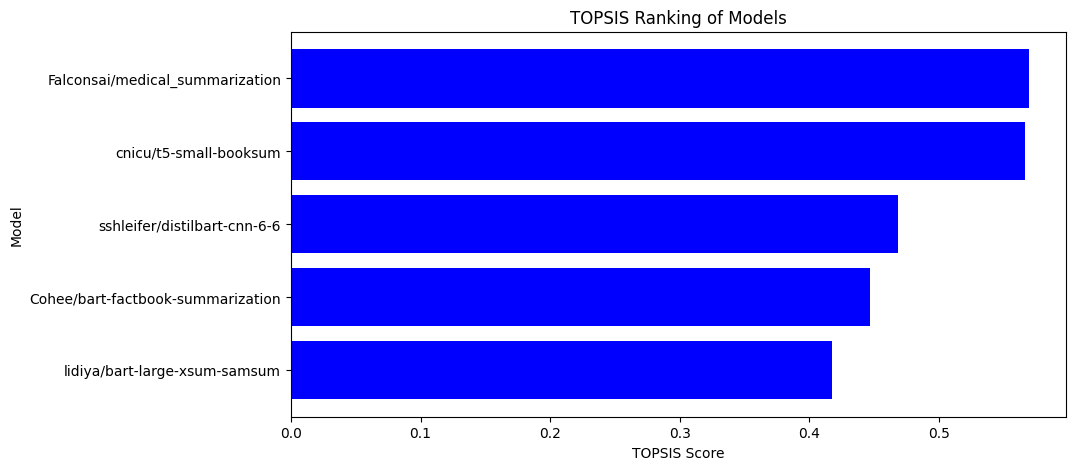

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

topsis_results = pd.read_csv("topsis.csv")

topsis_results_sorted = topsis_results.sort_values(by='Rank')


plt.figure(figsize=(10, 5))
plt.barh(topsis_results_sorted.iloc[:, 0], topsis_results_sorted['Topsis Score'], color='blue')
plt.xlabel('TOPSIS Score')
plt.ylabel('Model')
plt.title('TOPSIS Ranking of Models')
plt.gca().invert_yaxis()
plt.show()

In [17]:
topsis_results

,Unnamed: 0,BLEU,ROUGE-1,ROUGE-2,ROUGE-L,Topsis Score,Rank
0,cnicu/t5-small-booksum,0.0,0.150157,0.104762,0.141066,0.566739,2.0
1,sshleifer/distilbart-cnn-6-6,0.0,0.281160,0.136344,0.245674,0.468226,3.0
2,Falconsai/medical_summarization,0.0,0.173485,0.125947,0.161364,0.569526,1.0
3,Cohee/bart-factbook-summarization,0.0,0.515468,0.386699,0.436832,0.446973,4.0
4,lidiya/bart-large-xsum-samsum,0.0,0.544907,0.369527,0.444187,0.417637,5.0
